In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from luwiji.image_proc import demo, illustration

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

#### Import Data

In [2]:
df = pd.read_csv('data/small_mnist.csv')
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# untuk cek nilai tertinggi
df.iloc[1:].values.max()

255

### Split data

In [4]:
X = df.drop(columns='label').values / 255
y = df.label.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 784), (400, 784), (1600,), (400,))

### Visualisasi

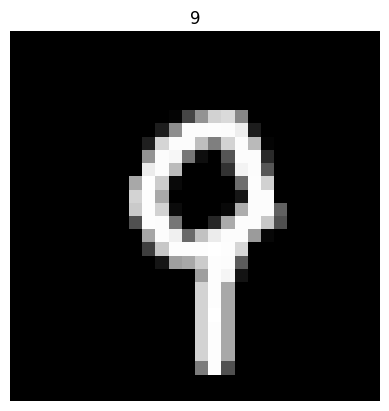

In [5]:
N = len(X_train)
idx = np.random.choice(N)
img, label = X_train[idx], y_train[idx]

plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(label)
plt.axis('off');

In [6]:
# untuk mengecek jumlah setiap dataset
df.label.value_counts()

label
0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: count, dtype: int64

### Training

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [8]:
pipeline = Pipeline([
    ('algo', RandomForestClassifier(n_jobs=1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.rf_params, cv=3, n_iter=50, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__max_depth': 22, 'algo__max_features': 0.1185260448662222, 'algo__min_samples_leaf': 2, 'algo__n_estimators': 187}
0.999375 0.9025057795953932 0.9275


### Prediksi dan Visualisasi

In [74]:
idx = np.random.choice(len(X_test), size=10, replace=False)
images, labels = X_test[idx], y_test[idx]
preds = model.predict(images)
preds

array([5, 0, 1, 2, 6, 7, 7, 5, 3, 2], dtype=int64)

In [75]:
labels

array([3, 0, 1, 2, 6, 7, 7, 5, 3, 2], dtype=int64)

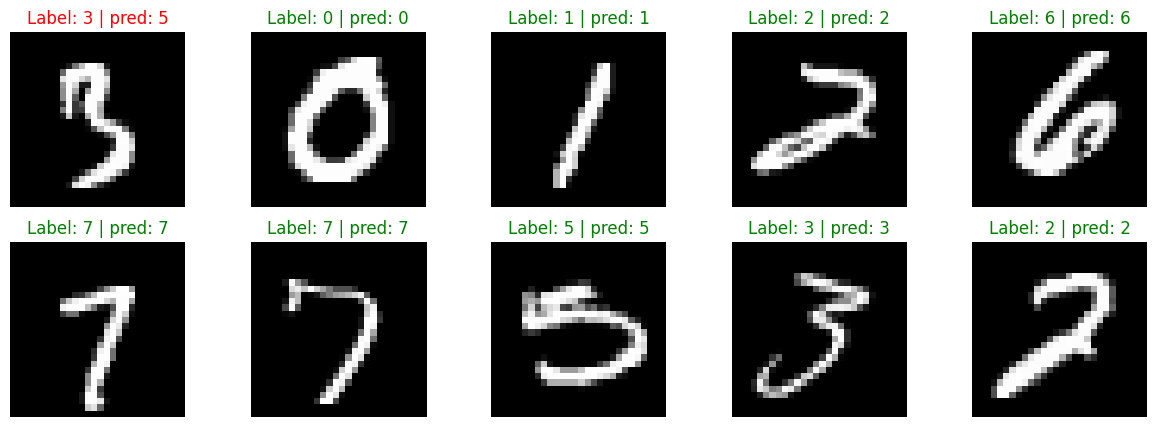

In [89]:
fig, ax = plt.subplots(2, 5, figsize=(15, 5))
for img, label, pred, ax in zip(images, labels, preds, ax.flatten()):
    font = {"color": "g"} if label == pred else {"color": "r"}
    ax.imshow(img.reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {label} | pred: {pred}", fontdict=font)
    ax.axis('off');

### Why it Works

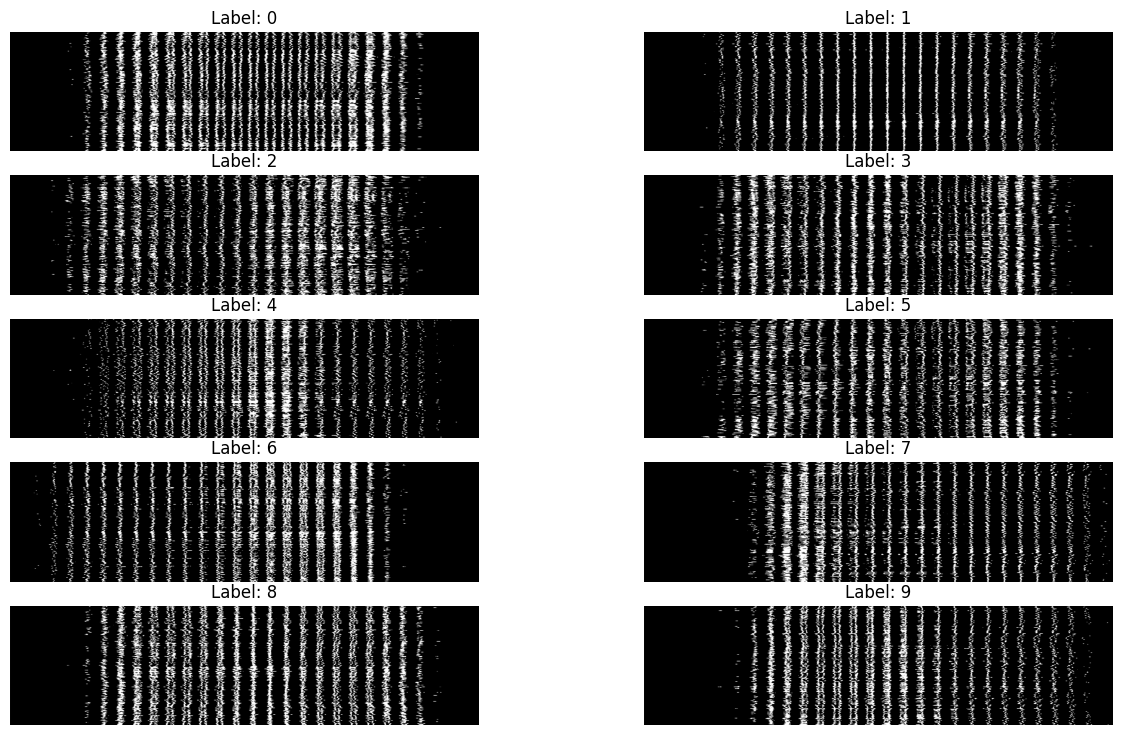

In [94]:
fig, ax = plt.subplots(5, 2, figsize=(15,9))

for idx, ax in enumerate(ax.flatten()):
    ax.imshow(df.iloc[idx*200:(idx+1)*200], cmap='gray')
    ax.set_title(f"Label: {idx}")
    ax.axis('off');